In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.constraints import max_norm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from keras import metrics, optimizers
from keras.callbacks import EarlyStopping
from tensorflow import keras
from sklearn.model_selection import GridSearchCV

%matplotlib inline


In [2]:
from google.colab import files
uploaded = files.upload()

Saving lending_club_info.csv to lending_club_info.csv
Saving lending_club_loan_two.csv to lending_club_loan_two.csv


In [89]:
# load dataset
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')
df = pd.read_csv('lending_club_loan_two.csv')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [91]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


# EDA

In [92]:
len(df[df['loan_status']=='Fully Paid'])/len(df)

0.8038709188697826

In [93]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


<Axes: xlabel='loan_status', ylabel='count'>

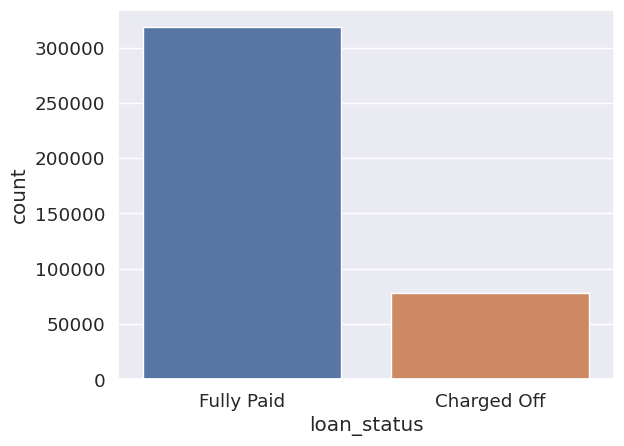

In [94]:
sns.countplot(x='loan_status', data=df)

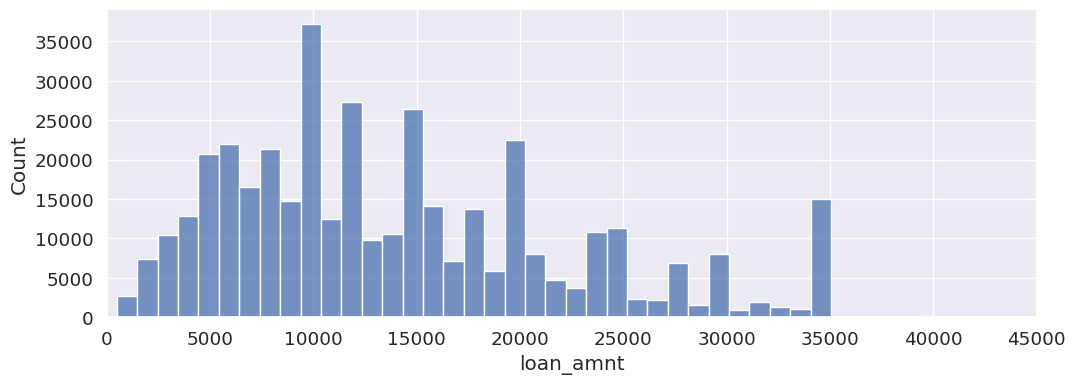

In [95]:
fig, ax = plt.subplots(figsize=(12, 4))

# Plot distribution of loan amount
sns.histplot(data=df, x='loan_amnt', bins=40, kde=False)

# Set plot limits
ax.set_xlim([0, 45000])

# Show plot
plt.show()

<ipython-input-96-5d4432fa79e5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis', ax=ax)


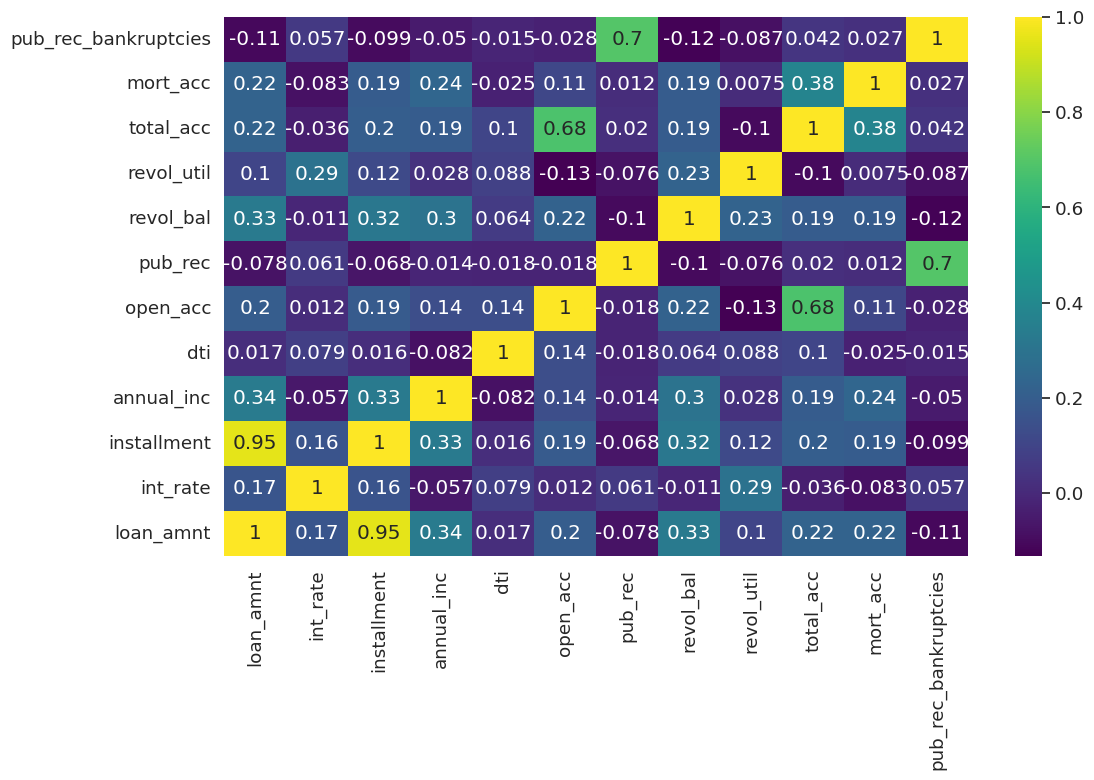

In [96]:
fig, ax = plt.subplots(figsize=(12, 7))

# Plot heatmap of correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='viridis', ax=ax)

# Invert y-axis
ax.invert_yaxis()

# Show plot
plt.show()

<Axes: xlabel='installment', ylabel='loan_amnt'>

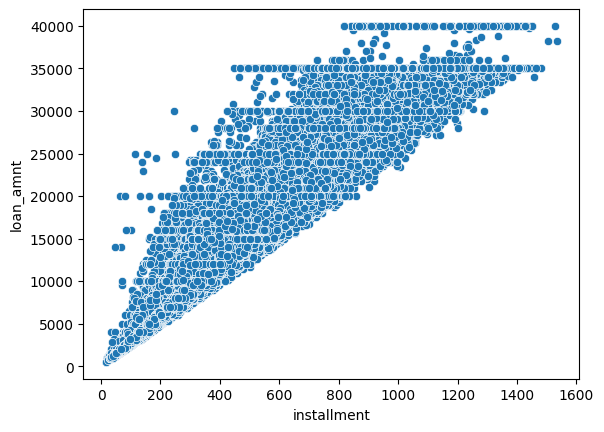

In [11]:
sns.scatterplot(x='installment',y='loan_amnt', data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

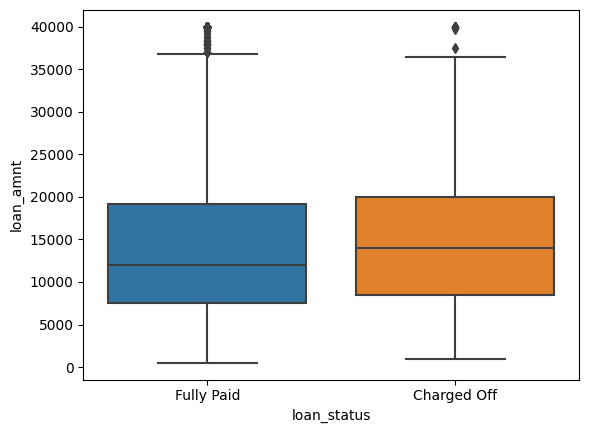

In [12]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

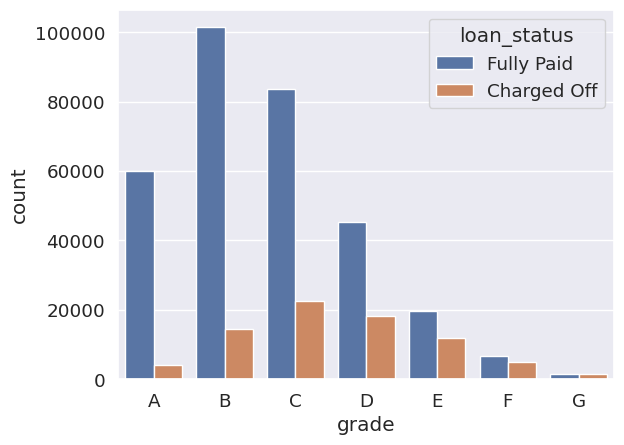

In [97]:
# Set order of x-axis categories
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Plot countplot of loan status by grade
sns.countplot(x='grade', data=df, hue='loan_status', order=order)

# Show plot
plt.show()

<Axes: xlabel='sub_grade', ylabel='count'>

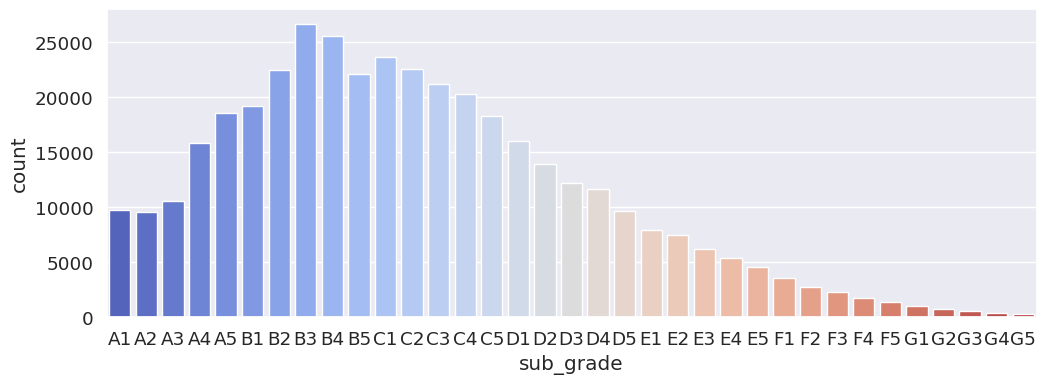

In [99]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm' )

<Axes: xlabel='sub_grade', ylabel='count'>

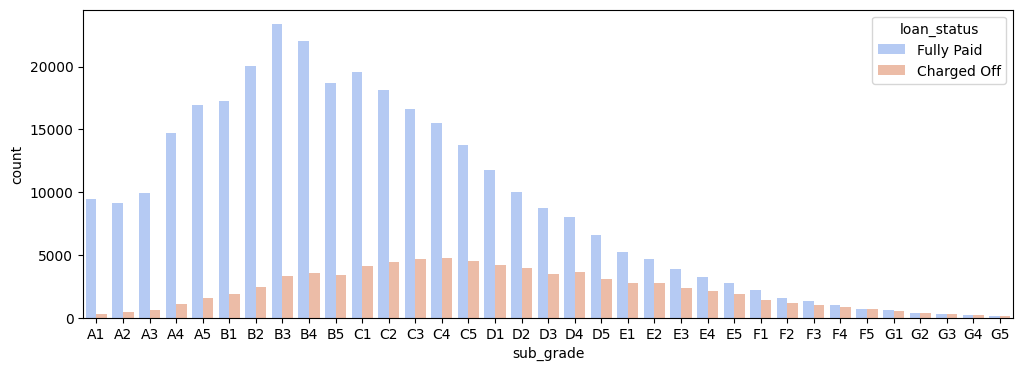

In [15]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df, order=subgrade_order,palette='coolwarm', hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

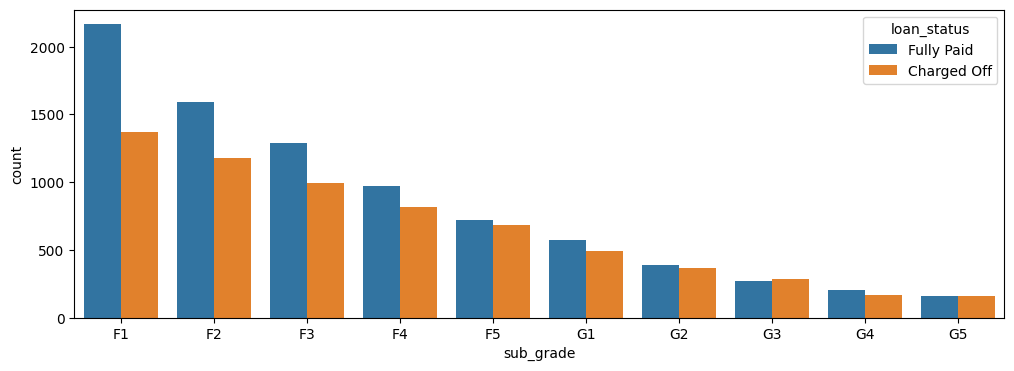

In [16]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [100]:
# Define a mapping dictionary
mapping_dict = {'Fully Paid': 1, 'Charged Off': 0}

# Create a new column 'loan_repaid' by mapping values in 'loan_status' using the mapping dictionary
df['loan_repaid'] = df['loan_status'].map(mapping_dict)

In [101]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<ipython-input-19-84269d723ac1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')


<Axes: >

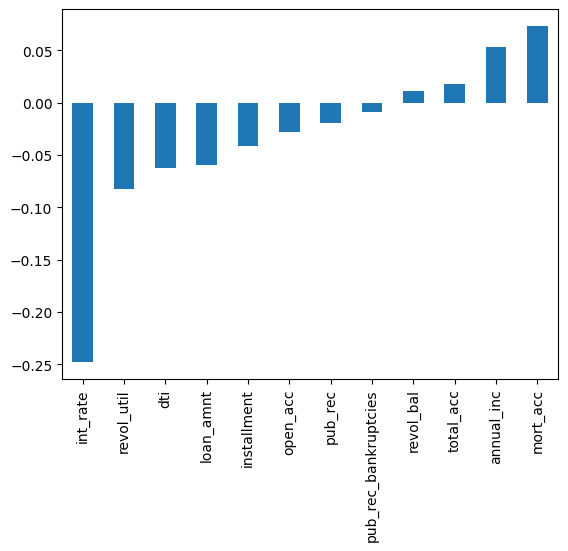

In [19]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Preprocessing

In [20]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [21]:

# remove emp_title column
df = df.drop('emp_title',axis=1)

<Axes: xlabel='emp_length', ylabel='count'>

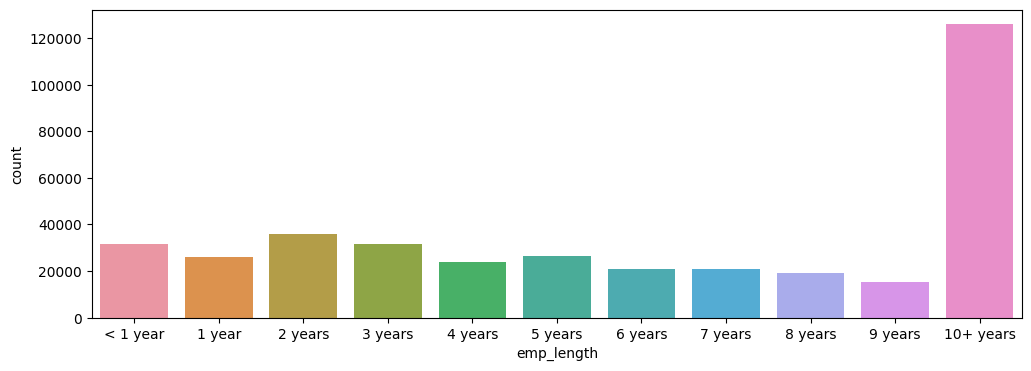

In [22]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

<Axes: xlabel='emp_length', ylabel='count'>

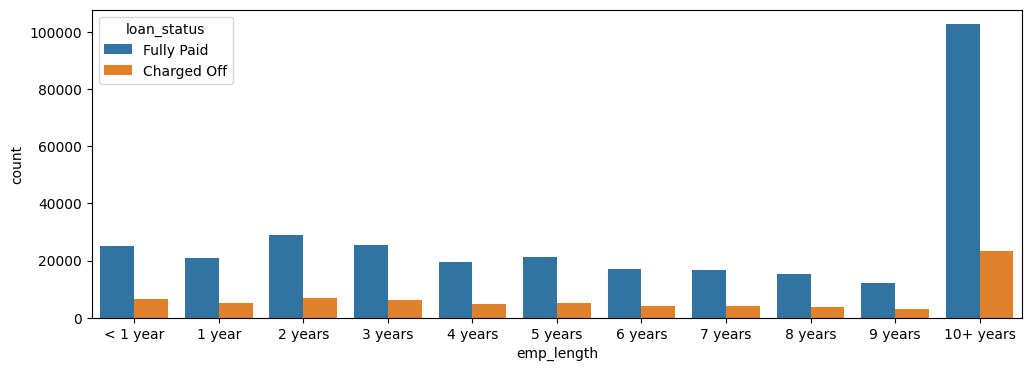

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [24]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

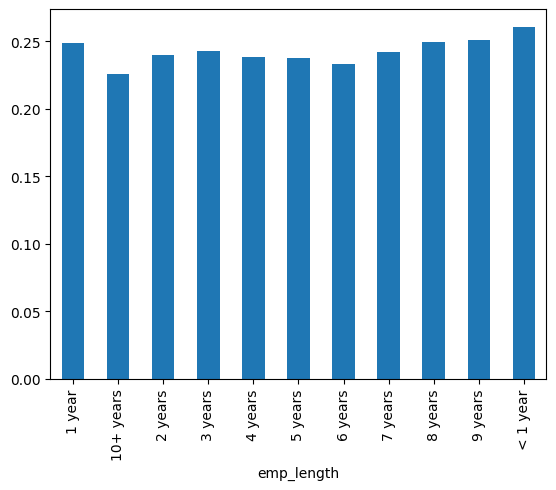

In [25]:
emp_len.plot(kind='bar')

In [26]:
# drop emp_length and title columns
df = df.drop('emp_length',axis=1)
df = df.drop('title',axis=1)

In [27]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


<ipython-input-27-cbc1f4cfb9d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [28]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

<ipython-input-28-d5f3724f8e1b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = df.groupby('total_acc').mean()['mort_acc']


In [29]:
# helper function
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [30]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [31]:
df = df.dropna()

In [32]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [35]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [36]:
df = df.drop('grade',axis=1)

In [37]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [38]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [39]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [40]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [41]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [42]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [43]:
df = df.drop('issue_d',axis=1)

In [44]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [45]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

# Train Test Split

In [46]:
df = df.drop('loan_status',axis=1)

In [48]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [50]:
# Standardize the datase
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_val -= mean
X_val /= std
X_test -= mean
X_test /= std

# Baseline Model

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
[[ 9096  6316]
 [ 7193 56439]]


              precision    recall  f1-score   support

           0       0.56      0.59      0.57     15412
           1       0.90      0.89      0.89     63632

    accuracy                           0.83     79044
   macro avg       0.73      0.74      0.73     79044
weighted avg       0.83      0.83      0.83     79044

f1 score: 0.893
accuracy score: 0.829
AUC score: 0.739


Text(63.25, 0.5, 'True label')

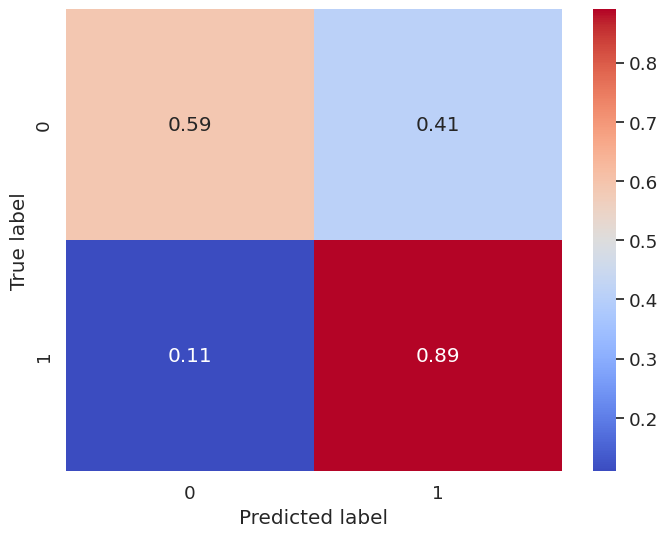

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7, 9],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 3]}

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)

# Fit the model to the training data using the best hyperparameters
clf_cv = DecisionTreeClassifier(**grid_search.best_params_)
clf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = clf.predict(X_test)

# plot the confusion matrix heatmap
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
print('\n')
print(classification_report(y_test,y_pred))
matrix = matrix.astype("float") / matrix.sum(axis=1)[:, np.newaxis]
matrix = np.round(matrix, 2)

# Calculate the accuracy of the model
f1 = f1_score(y_test, y_pred)
print(f'f1 score: {f1:.3f}')
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy score: {accuracy:.3f}")
auc = roc_auc_score(y_test, y_pred)
print(f'AUC score: {auc:.3f}')

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(matrix, cmap='coolwarm', annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Random Forest

Best hyperparameters: {'max_depth': 15, 'n_estimators': 50}
[[ 6575  8837]
 [   16 63616]]


              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15412
           1       0.88      1.00      0.93     63632

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044

f1 score: 0.935
accuracy score: 0.888
AUC score: 0.713


Text(63.25, 0.5, 'True label')

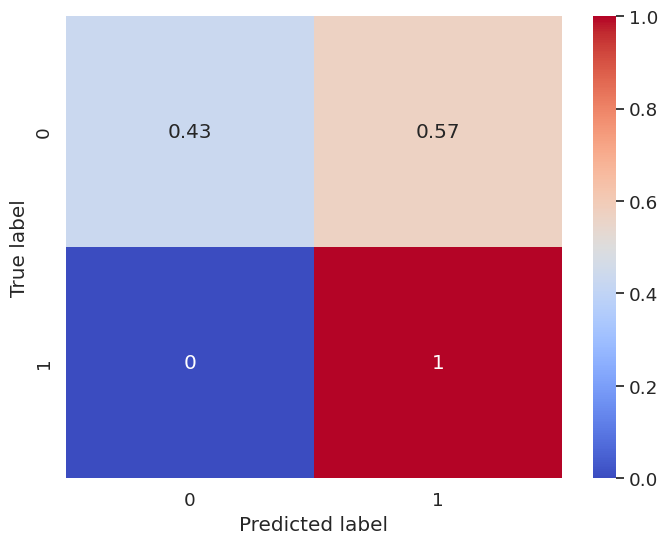

In [106]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15]
}

# Perform a grid search with cross-validation to find the best hyperparameters
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", rf_cv.best_params_)

# Evaluate the model on the test set using the best hyperparameters
y_pred = rf_cv.predict(X_test)

# plot the confusion matrix heatmap
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
print('\n')
print(classification_report(y_test,y_pred))
matrix = matrix.astype("float") / matrix.sum(axis=1)[:, np.newaxis]
matrix = np.round(matrix, 2)

# Calculate the accuracy of the model
f1 = f1_score(y_test, y_pred)
print(f'f1 score: {f1:.3f}')
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy score: {accuracy:.3f}")
auc = roc_auc_score(y_test, y_pred)
print(f'AUC score: {auc:.3f}')

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(matrix, cmap='coolwarm', annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# ANN Model

In [64]:
METRICS = [
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc')
]

In [79]:
from keras.layers import LeakyReLU
# create a function to build ANN model
def make_model(metrics=METRICS):
  model = Sequential([
      keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[-1],)),
     # keras.layers.BatchNormalization(),
      keras.layers.Dropout(0.1),
      keras.layers.Dense(128, activation='relu'),
     # keras.layers.BatchNormalization(),
      keras.layers.Dropout(0.1),
      keras.layers.Dense(128, activation='relu'),
     # keras.layers.BatchNormalization(),
      keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
      loss='binary_crossentropy',
      optimizer=optimizers.Adam(learning_rate=1e-3),
      metrics=METRICS)
  
  return model

In [80]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='min',
    restore_best_weights=True)

In [81]:
model = make_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               10112     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 43,265
Trainable params: 43,265
Non-trai

In [82]:
EPOCHS = 50
BATCH_SIZE = 256

fitted_model = model.fit(x=X_train, 
          y=y_train, 
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(X_val, y_val), 
          callbacks=[early_stopping]
          )

Epoch 1/50
989/989 [==============================] - 11s 8ms/step - loss: 0.2808 - accuracy: 0.8851 - recall: 0.9930 - auc: 0.8898 - val_loss: 0.2596 - val_accuracy: 0.8895 - val_recall: 0.9954 - val_auc: 0.9034
Epoch 2/50
989/989 [==============================] - 7s 8ms/step - loss: 0.2596 - accuracy: 0.8883 - recall: 0.9945 - auc: 0.9036 - val_loss: 0.2568 - val_accuracy: 0.8890 - val_recall: 0.9969 - val_auc: 0.9052
Epoch 3/50
989/989 [==============================] - 6s 6ms/step - loss: 0.2575 - accuracy: 0.8886 - recall: 0.9944 - auc: 0.9056 - val_loss: 0.2570 - val_accuracy: 0.8890 - val_recall: 0.9982 - val_auc: 0.9050
Epoch 4/50
989/989 [==============================] - 7s 7ms/step - loss: 0.2565 - accuracy: 0.8888 - recall: 0.9937 - auc: 0.9067 - val_loss: 0.2563 - val_accuracy: 0.8894 - val_recall: 0.9965 - val_auc: 0.9061
Epoch 5/50
989/989 [==============================] - 6s 6ms/step - loss: 0.2557 - accuracy: 0.8894 - recall: 0.9930 - auc: 0.9076 - val_loss: 0.2558 -

2471/2471 [==============================] - 4s 2ms/step
[[ 6903  8509]
 [  296 63336]]


              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15412
           1       0.88      1.00      0.94     63632

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

f1 score: 0.935
accuracy score: 0.889
AUC score: 0.722


Text(63.25, 0.5, 'True label')

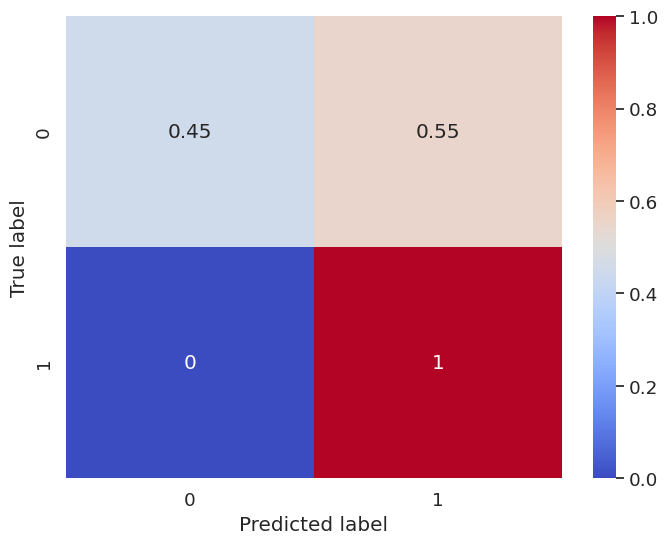

In [83]:
prediction = model.predict(X_test)
y_pred = (prediction>0.5)

# plot the confusion matrix heatmap
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
print('\n')
print(classification_report(y_test,y_pred))
matrix = matrix.astype("float") / matrix.sum(axis=1)[:, np.newaxis]
matrix = np.round(matrix, 2)

# Calculate the accuracy of the model
f1 = f1_score(y_test, y_pred)
print(f'f1 score: {f1:.3f}')
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy score: {accuracy:.3f}")
auc = roc_auc_score(y_test, y_pred)
print(f'AUC score: {auc:.3f}')

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(matrix, cmap='coolwarm', annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

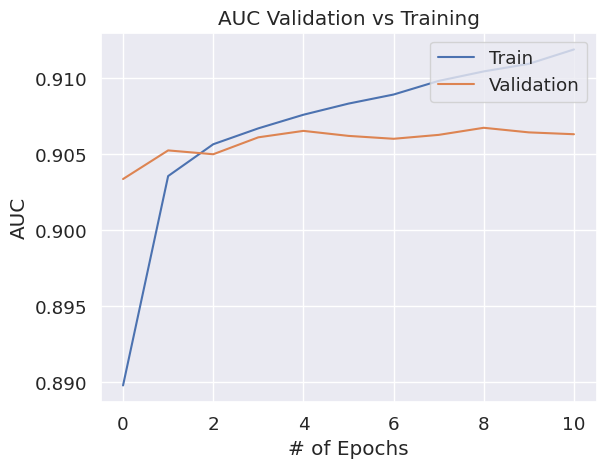

In [84]:
# plot the graph
plt.plot(fitted_model.history['auc'])
plt.plot(fitted_model.history['val_auc'])
plt.title('AUC Validation vs Training')
plt.ylabel('AUC')
plt.xlabel('# of Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

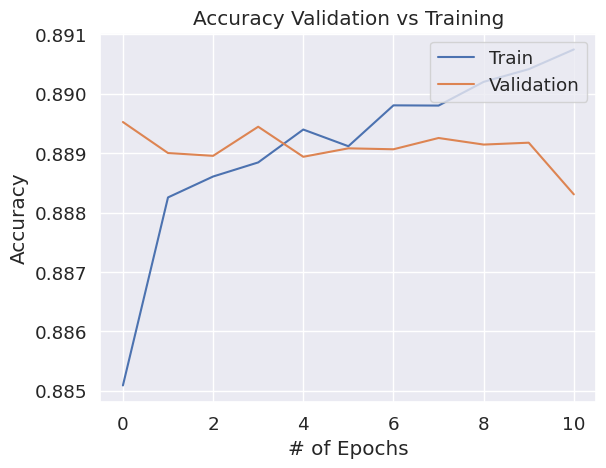

In [85]:
# plot the graph
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.title('Accuracy Validation vs Training')
plt.ylabel('Accuracy')
plt.xlabel('# of Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

|Model         |Accuracy|F1 score|AUC
|-------------:|-------:|------:|------:|
|Decision Tree          |0.829  |0.893 |0.738
|Random Forest   |0.888  |0.935 |0.713
|ANN  |0.889  |0.935 |0.722